In [1]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt

In [20]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'D'), ('A', 'E'), ('B', 'C'),
                  ('B', 'D'), ('C', 'D'), ('C', 'F'), ('E', 'F'),
                 ('E', 'G'), ('F', 'G'), ('G', 'H'), ('G', 'I')])

Creating a list of tuples which have the two nodes and the number of common neighbors. And including the nodes that are not connected with each other.
The ones that don't have an edge between them by using the function non_edges. 

In [47]:
common_neigh = [(e[0], e[1], len(list(nx.common_neighbors(G, e[0],
e[1])))) for e in nx.non_edges(G)]

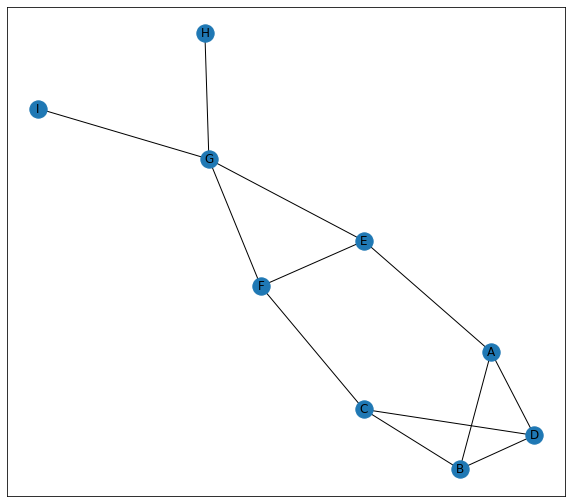

In [48]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

<b>What is the Jaccard Coefficient between node A and F? Enter your answer as a fraction below the graphic.</b>

In [49]:
list(nx.jaccard_coefficient(G, [('A', 'F')]))

[('A', 'F', 0.2)]

<b>What is the Resource Allocation index of Node I and H?</b>

In [50]:
list(nx.resource_allocation_index(G, [('I', 'H')]))

[('I', 'H', 0.25)]

<b>What is the Preferential Attachment of Node A and G?</b>

In [51]:
list(nx.preferential_attachment(G, [('A', 'G')]))

[('A', 'G', 12)]

<b>What is the Common Neighbor Soundarajan-Hopcroft score of node I and H?</b>

Assign nodes to communities with attribute node
“community”

In [54]:
G.nodes['A']['community'] = 0
G.nodes['B']['community'] = 0
G.nodes['C']['community'] = 0
G.nodes['D']['community'] = 0
G.nodes['E']['community'] = 1
G.nodes['F']['community'] = 1
G.nodes['G']['community'] = 1
G.nodes['H']['community'] = 1
G.nodes['I']['community'] = 1

In [55]:
list(nx.cn_soundarajan_hopcroft(G, [('I', 'H')]))

[('I', 'H', 2)]

# Quiz questios

<b>1. Suppose P(k) denotes the degree distribution of the following network, what is the value of P(2) + P(3)?</b>

In [65]:
G1 = nx.Graph()
G1.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'F'), ('B', 'C'),
                  ('B', 'D'), ('B', 'E'), ('C', 'E'), ('C', 'F'),
                 ('D', 'B'), ('D', 'E'), ('E', 'F')])

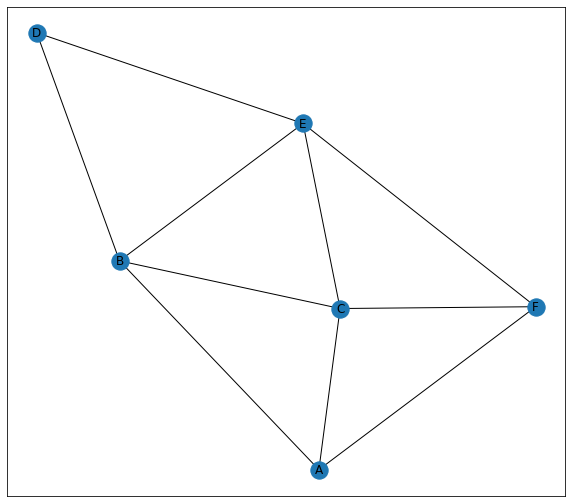

In [60]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G1)

In [62]:
degrees = dict(G1.degree())
degree_sum = sum(dict(G1.degree()).values())

degrees, degree_sum, len(G1.nodes())

({'A': 3, 'B': 4, 'C': 4, 'F': 3, 'D': 2, 'E': 4}, 20, 6)

In [63]:
p_2 = 1/6
p_3 = 2/6

q1 = p_2 + p_3
q1

0.5

<b>2. Let P(k) denote the in-degree distribution of the given network below. What value of k gives the highest value of P(k)?</b>

In [67]:
G2 = nx.DiGraph()
G2.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'),
                  ('B', 'C'), ('C', 'A'), ('D', 'E'), ('E', 'C')])

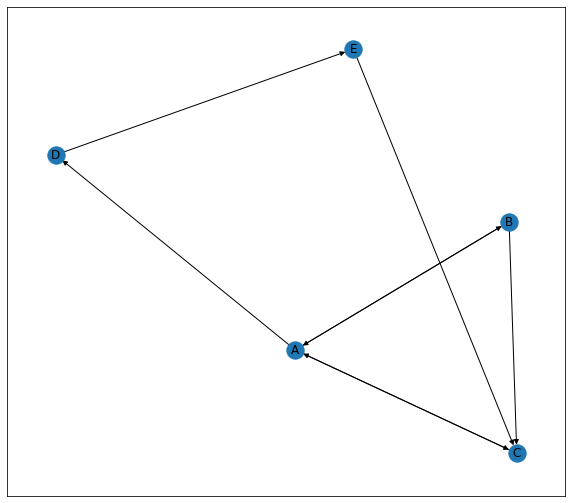

In [68]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G2)

In [71]:
nx.number_of_nodes(G2), G2.in_degree()

(5, InDegreeView({'A': 2, 'B': 1, 'C': 3, 'D': 1, 'E': 1}))

k = 1 is the most common degree

since our denominator is a fixed value nx.number_of_nodes(g)

3/nx.number_of_nodes(g) is the highest we can achieve

In [72]:

3/nx.number_of_nodes(G2)

0.6

<b>3. Select all that apply</b>

* If we draw a power law distribution in log-log scale, the distribution will look like a straight line.

* The Preferential Attachment Model generates a network with a power law degree distribution.

<b>4. Select all that apply</b>

* Some Small-world networks have high local clustering coefficient and small average shortest path.

* In the small-world model starting with k nearest neighbors, increasing the rewiring probability p generally decreases both the average clustering coefficient and average shortest path.

<b>5. Suppose we want to generate several small-world networks with k nearest neighbors and rewiring probability p. If p remains the same and we increase k, which best describes the variation of average local clustering coefficient and average shortest path?</b>

* Average local clustering coefficient will increase and average shortest path will decrease.

<b>6. Based on the network below, suppose we want to apply the common neighbors measure to add an edge from node H, which is the most probable node to connect to H?</b>

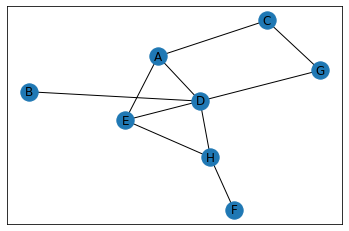

In [74]:
G6 = nx.Graph()
G6.add_edges_from(
    [
        ('C', 'G'), ('C', 'A'), ('A', 'D'), ('A', 'E'), ('G', 'D'), 
        ('D', 'E'), ('D', 'B'), ('E', 'H'), ('D', 'H'), ('H', 'F')
    ])

pos = nx.kamada_kawai_layout(G6)
nx.draw_networkx(G6, pos)

In [78]:
from operator import itemgetter
comm_neig = sorted([(e[0], e[1], 
                     len(list(nx.common_neighbors(G6, e[0], e[1])))) for e in nx.non_edges(G6)],
                   key=itemgetter(2),
                   reverse=True)

In [80]:
pairs_H = [(node, h, common) for (node, h, common) in comm_neig if (node == 'H' or h == 'H')]
pairs_H[0][0]

'A'

<b>Based on the network below, what is the Jaccard coefficient of nodes D and C?</b>

In [84]:
jacc = list(nx.jaccard_coefficient(G6))
q7 = [wanted for wanted in jacc if (wanted[0] == 'D' and wanted[1] == 'C')]
q7[0][2]

0.4

In [87]:
rai = list(nx.resource_allocation_index(G6))
q8 = [wanted for wanted in rai if (wanted[0] == 'D' and wanted[1] == 'C')]
q8[0][2]

0.8333333333333333

In [89]:
pref = sorted(list(nx.preferential_attachment(G6)), key=itemgetter(2), reverse=True)
q9 = [wanted for wanted in pref if (wanted[0] == 'D' and wanted[1] == 'C')]
q9[0][2]

10

<b>Assume there are two communities in this network: {A, B, C, D, G} and {E, F, H}. Which of the following statements is(are) True? Select all that apply.</b>

In [92]:
g_comm = G6.copy()
comm0 = 'A B C D G'.split()
comm1 = 'E F H'.split()

comm0, comm1

(['A', 'B', 'C', 'D', 'G'], ['E', 'F', 'H'])

In [94]:
for node in comm0:
    g_comm.nodes[node]['community'] = 0

for node in comm1:
    g_comm.nodes[node]['community'] = 1

In [96]:
# Acknowledge the community value
g_comm.nodes(data=True)

NodeDataView({'C': {'community': 0}, 'G': {'community': 0}, 'A': {'community': 0}, 'D': {'community': 0}, 'E': {'community': 1}, 'B': {'community': 0}, 'H': {'community': 1}, 'F': {'community': 1}})

In [97]:
cn_soun_hop = list(nx.cn_soundarajan_hopcroft(g_comm))
# cn_soun_hop

In [99]:
item1 = [wanted for wanted in cn_soun_hop if (wanted[0] == 'D' and wanted[1] == 'C')]
item1 # False

[('D', 'C', 4)]

In [100]:
item2 = [wanted for wanted in cn_soun_hop if (wanted[0] == 'A' and wanted[1] == 'G')]
item2 # True

[('A', 'G', 4)]

In [101]:
ra_sound_hop = list(nx.ra_index_soundarajan_hopcroft(g_comm))
# ra_sound_hop

In [102]:
item3 = [wanted for wanted in ra_sound_hop if (wanted[0] == 'E' and wanted[1] == 'F')]
item3 # False

[('E', 'F', 0.3333333333333333)]

In [104]:
item3 = [wanted for wanted in ra_sound_hop if (wanted[0] == 'A' and wanted[1] == 'G')]
item3 # True

[('A', 'G', 0.7)]

* The Common Neighbor Soundarajan-Hopcroft score of node A and node G is 4.

* The Resource Allocation Soundarajan-Hopcroft score of node A and node G is 0.7
